## Flower Power: PCA and classification (30 points)

<img src="https://raw.githubusercontent.com/YData123/sds265-fa21/main/demos/classification/irises.png" width="500" align="top">


In this problem you will carry out principal components analysis and classification on the iris data. The task will be to reduce the dimension from four to two using PCA, and then to train logistic regression models on the projected data.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

The following cell plots the original data in terms of sepal width and petal length.

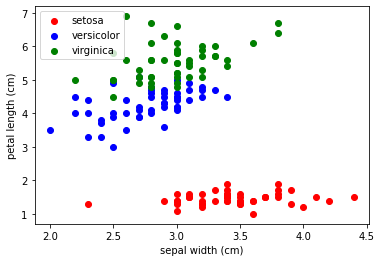

In [2]:
# don't change this code
from sklearn.datasets import load_iris

fig = plt.figure()
iris = load_iris()
x_index = 1
y_index = 2
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'green']
for c in np.arange(3):
    mask = (iris.target==c)
    plt.scatter(iris.data[mask, x_index], iris.data[mask, y_index], color=colors[c], label=iris.target_names[c])

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

In [3]:
X = iris.data
y = iris.target

#### 2.1 Carry out PCA

In the following cell, reduce the dimension of the data from four to two dimensions by carrying out principal components analysis. Let `pv1` be the first principal vector and let `pv2` be the second principal vector. Let `pcs` be the principal components, that is, the projection of the data onto the first two principal vectors.


In [4]:
# your code here
X = X - np.mean(X,0)
pca = PCA()
pca.fit(X)
pcs = pca.fit_transform(X)


pv1 = pca.components_[0] # your code here
pv2 = pca.components_[1] # your code here
pcs = pca.fit_transform(X)[:,0:2] # your code here

# Comment out the following lines!
#pv1 = np.random.normal(size=4)
#pv2 = np.random.normal(size=4)
#pcs = np.random.normal(size=2*X.shape[0]).reshape(X.shape[0], 2)


The next cell plots the principal vectors. (Don't change this code.)

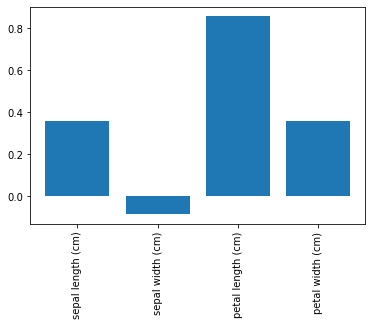

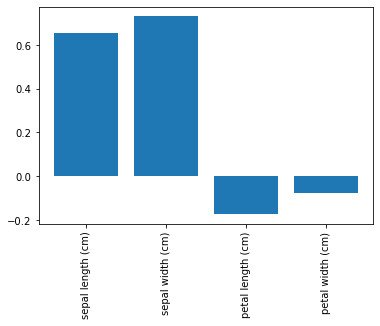

In [5]:
plt.bar(np.arange(4), pv1)
plt.xticks(np.arange(4), iris.feature_names, rotation='vertical')
plt.show()

plt.bar(np.arange(4), pv2)
plt.xticks(np.arange(4), iris.feature_names, rotation='vertical')
plt.show()


#### 2.2 Qualitative description of vectors

Describe qualitatively the main properties of the data that the first two principal vectors are capturing.

[Your answer here in markdown]

The first principal vector is capturing variation in petal length. The second principal vector is capturing variation in sepal length and width.


#### 2.3 Verify orthogonality

Write a single code that evaluates to `True` if the first two principal vectors are orthogonal, and to `False` otherwise. 


In [6]:
# Your line here

np.abs(np.dot(pv1, pv2) < 1e-15)


True

Plot the projections of data onto the first two principal components. To do this, use the code provided below, where the principal components `pcs` are the values you computed above. (Don't change the code in the following cell.)

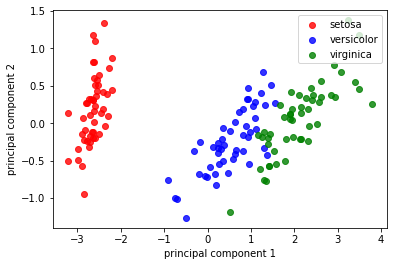

In [7]:
# do not change this code

fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'green']
for i in np.arange(3):
    mask = y==i
    ax.scatter(pcs[mask,0], pcs[mask,1], alpha=0.8, c=colors[i], label=iris.target_names[i])
plt.legend(loc='upper right')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

#### 2.4 Describe your plot

Describe the resulting plot. How is it different than and similar to the plot above for petal length vs. sepal width?


[Your markdown here]


#### 2.5 Training logistic regression models

Next, construct a series of logistic regression using an increasing number of training points, **also using the first two principal components as predictor variables**. Specifically:

* Let the sample size range from 10% of the data to 90% of the data, in increments of 10%
* For each sample size, train a logistic regression model on randomly selected training points, and test on the remaining data
* For each sample size, run 500 trials and average the error rates
* Plot the resulting average error rates as a function of sample percentage of the data

*If you are not confident that you have the correct principal components, you may use the petal length and sepal width variables for partial credit.*

Some important notes and hints:

* Use the function sklearn.model_selection.train_test_split in each trial to randomly split the data into training and test sets. For example, you can use train_test_split(X, y, train_size=.1)
* Use `lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')` as written. This will fit a logistic regression model to predict the three class labels (*versicolor*, *virginica*, and *setosa*). This is a linear model of the log-odds, just as for binary logistic regression. The decision boundaries will be linear functions of the two principal components.
* In a little more detail, in a logistic regression model to carry out three-way classification where $Y$ can be 0, 1, or 2, the model takes the form
$$ P(Y=0 \,|\, x) = \frac{1}{1 + e^{\beta_1^T x} + e^{\beta_2^T x}}$$
<br>
$$ P(Y=1 \,|\, x) = \frac{e^{\beta_1^T x}}{1 + e^{\beta_1^T x} + e^{\beta_2^T x}}$$
<br>
$$ P(Y=2 \,|\, x) = \frac{e^{\beta_2^T x}}{1 + e^{\beta_1^T x} + e^{\beta_2^T x}}$$
<br>
* The decision boundaries between any two classes in such a model are linear.

100%|██████████| 9/9 [00:21<00:00,  2.37s/it]


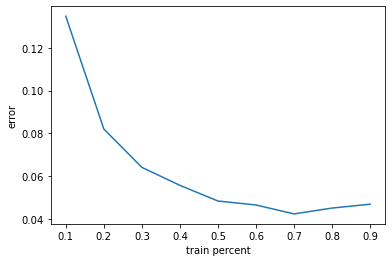

In [8]:

# 5 points

X = pcs
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr_error_rate = []
trials = 500
train_percent = np.linspace(.1,.9,num=9)

# your code here
from tqdm import tqdm
for p in tqdm(train_percent):
    errs = []
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=p)
        lr.fit(X_train, y_train)
        err = np.mean(lr.predict(X_test) != y_test)
        errs.append(err)
    this_err = np.mean(errs)
    lr_error_rate.append(this_err)
    
plt.plot(train_percent, lr_error_rate)
plt.xlabel('train percent')
_ = plt.ylabel('error')



#### 2.6 Finding the minimum error

What is the smallest average error attained by logistic regression?

In [9]:
min_error = np.min(np.array(lr_error_rate)) # your code here
print("The minimum error attained by the logistic regression is %.2f%%" % (100*min_error))


The minimum error attained by the logistic regression is 4.24%


#### 2.7 Conceptual comparison with decision trees

Suppose you were to replace the logistic regression model by a classification tree. Which do you think would perform better, decision trees or logistic regression? Explain why this might be the case.


[Your answer here in markdown]

The decision tree has to make axis-aligned splits--that is, it makes boxes aligned with the horizontal and vertical axes. Logistic regression, on the other hand, has decision boundaries that are linear. It's intuitively clear that the optimal decision boundary between the vericolor and virginica points above should be roughly a straight line with a slope of about 2/3. This can be easily captured by logistic regression, but not by decision trees. 

In fact, when run on the actual data, decision trees have a larger error rate.
